# Packages

In [100]:
import numpy as np
from scipy.integrate import odeint #to solve differntial equations
from scipy.interpolate import interp1d
import matplotlib.pyplot as pl #for plots
from matplotlib import rc, rcParams

# Options for plotting

In [101]:
fontsize=26
legendfontsize=22
font = {'size' : fontsize}
rc('font',**font)
rc('text', usetex=True)
rc('font', family='serif', serif='Computer Modern Roman')

In [102]:
#Color palette accessible to colorblind people (see https://davidmathlogic.com/colorblind/)
lightblue='#1A85FF'
blue='#005AB5'
darkblue='#222255'
purple='#5D3A9B'
magenta='#AA4499'
darkmagenta='#882255'
red='#DC3220'
orange='#E66100'
yellow='#FFC20A'
green='#40B0A6'

colors=[lightblue,blue,darkblue,purple,magenta,red,orange,yellow,green]

In [103]:
goldenratio=1.61803398875 #Standard Python ratio for plot width/height=8/6.

# Constants

In [104]:
G=4302./10.**9. #4.302*10^-6 kpc MSun^-1 (km/s)^2
c=2.99792458*10.**8.*10.**(-3.) #km/s (not m/s)
kpc_in_km=3.0857*10.**16. #kpc=3.0857*10^16 km

In [165]:
# #Rmin=10**(-20.) #kpc
# Rmin=10**(-10.) #kpc #Rmin has to be smaller than the Schwarzschild radius of a few km.
# Rmax=10.**5.
# print('[Rmin,Rmax]='+str([Rmin,Rmax])+' kpc')
# print('[Rmin,Rmax]='+str(np.array([Rmin,Rmax])*kpc_in_km)+' km') 

# NRvals=1000
# Rvals=np.logspace(np.log10(Rmin),np.log10(Rmax),NRvals)
# #print(Rvals)

# Primordial black hole

## Schwarzschild radius

In [106]:
def RSchwarzschild(MPBH): #MPBH in units of MSun 
    RSchwarzschild=(2.*G*MPBH)/c**2. #RSchwarzschild in kpc
    return RSchwarzschild

for MPBH in [10.]:
    print('RSchwarzschild='+str(RSchwarzschild(MPBH))+' kpc')
    print('RSchwarzschild='+str(RSchwarzschild(MPBH)*kpc_in_km)+' km') 

RSchwarzschild=9.573241082285334e-16 kpc
RSchwarzschild=29.540150007607853 km


## Gravitational potential 

In [126]:
def PhiPBH(MPBH,R): #MPBH in units of MSun 
    PhiPBH=-G*MPBH/R
    return PhiPBH

for MPBH in [10.]:
    for R in [100.]:
        print(PhiPBH(MPBH,R))

-4.302e-07


# Isothermal profile from Jeans equation

## Approximate analytical solution

In [195]:
def rhoisoappr(MPBH,rho0,sigma0,R):
    #_____Rmin_____
    #if MPBH==0:
    #    Rmin=10**(-10.) #kpc #Rmin has to be smaller than the Schwarzschild radius of a few km.
    #else:
    #    Rmin=RSchwarzschild(MPBH) #Two small for valid numerical solution.
    Rmin=10**(-10.) #kpc #Rmin has to be smaller than the Schwarzschild radius of a few km.
    #_____Approximate analytical solution_____
    rhoisoappr=rho0*np.exp((PhiPBH(MPBH,Rmin)-PhiPBH(MPBH,R))/sigma0**2.)
    return rhoisoappr

## Numerical solution

In [211]:
def IsothermalProfileInt(MPBH,rho0,sigma0): #MPBH in units of MSun 
    #_____Isothermal profile_____
    def rhoMiso(rhoM,R):
        [rhodm, Mdm] = rhoM
        #drhodm_dR = -((G*rhodm)/(sigma0**2.*R**2.))*(Mdm+Mb(R))
        drhodm_dR = -((G*rhodm)/(sigma0**2.*R**2.))*(Mdm+MPBH)
        dMdm_dR = 4.*np.pi*R**2.*rhodm
        return [drhodm_dR,dMdm_dR]
    #_____[Rmin,Rmax]_____
    #if MPBH==0:
    #    Rmin=10**(-10.) #kpc #Rmin has to be smaller than the Schwarzschild radius of a few km.
    #else:
    #    Rmin=RSchwarzschild(MPBH) #Two small for valid numerical solution.
    Rmin=10**(-10.) #kpc #Rmin has to be smaller than the Schwarzschild radius of a few km.
    Rmax=10.**5
    #print('[Rmin,Rmax]='+str([Rmin,Rmax])+' kpc')
    #print('[Rmin,Rmax]='+str(np.array([Rmin,Rmax])*kpc_in_km)+' km') 
    NRvals=1000
    Rvals=np.logspace(np.log10(Rmin),np.log10(Rmax),NRvals)
    #print(Rvals)
    #_____Initial conditions_____
    rhoMini = [rho0,(4.*np.pi)/3.*rho0*Rmin**3.]
    #_____Solve ODE_____
    sol = odeint(rhoMiso,rhoMini,Rvals,rtol=10.**(-10.),atol=10.**(-10.)) #Need higher precision here to find the right values for [rho0,sigma0] with leastsq.
    #print(sol)
    rhoiso=interp1d(Rvals,sol[:,0], kind='cubic',fill_value='extrapolate')
    Miso=interp1d(Rvals,sol[:,1], kind='cubic',fill_value='extrapolate')
    return [Rvals,rhoiso,Miso]

for rho0 in [10.**8.]:
    for sigma0 in [500.]:
        for MPBH in [10.]:
            [Rvals,rhoisoInt,MisoInt]=IsothermalProfileInt(MPBH,rho0,sigma0)
            print(np.transpose([Rvals,rhoisoInt(Rvals),MisoInt(Rvals)]))

[[1.00000000e-10 1.00000000e+08 4.18879020e-22]
 [1.03517796e-10 9.43199820e+07 4.63315493e-22]
 [1.07159340e-10 8.91395523e+07 5.09855416e-22]
 ...
 [9.33189772e+04 1.04573596e+00 1.08080934e+16]
 [9.66017480e+04 9.76119562e-01 1.11838159e+16]
 [1.00000000e+05 9.11162099e-01 1.15728603e+16]]


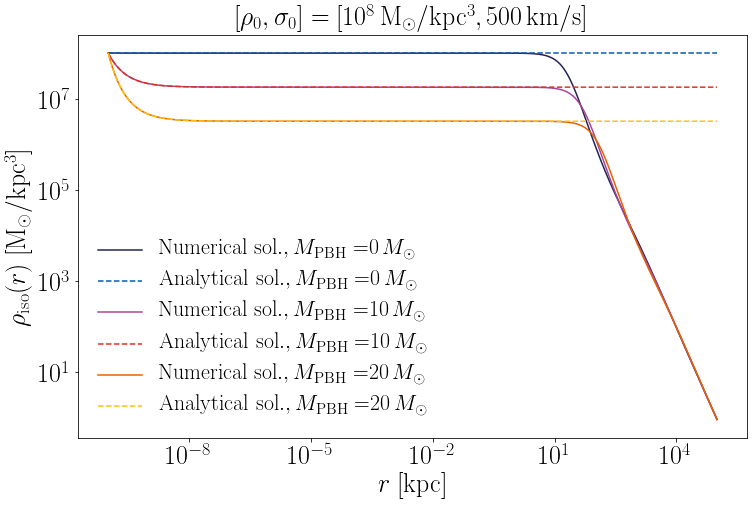

In [212]:
MPBHvals=[0,10,20]
colors=[[darkblue,blue],[magenta,red],[orange,yellow]]

pl.figure(figsize=(12,12/goldenratio))
pl.xscale('log')
pl.yscale('log')

for rho0 in [10.**8.]:
    for sigma0 in [500.]:
        for i in range(0,len(MPBHvals)):
            MPBH=MPBHvals[i]
            [Rvals,rhoisoInt,MisoInt]=IsothermalProfileInt(MPBH,rho0,sigma0)
            #print([rhoisoInt,MisoInt])
            pl.plot(Rvals,rhoisoInt(Rvals),color=colors[i][0],linestyle='-',label=r'${\rm Numerical~sol.,} \, M_{\rm PBH}=$'+str(MPBH)+r'$\,M_{\odot}$') 
            pl.plot(Rvals,rhoisoappr(MPBH,rho0,sigma0,Rvals),color=colors[i][1],linestyle='--',label=r'${\rm Analytical~sol.,} \, M_{\rm PBH}=$'+str(MPBH)+r'$\,M_{\odot}$')
            #if not i==0:
            #    pl.axvline(RSchwarzschild(MPBH),color=colors[i][1],linestyle=':',label='Schwarzschild radius')
#pl.xlim([10.**(-16.),10.**5.])
pl.xlabel(r'$r \; \rm{[kpc]}$',fontsize=fontsize)
pl.ylabel(r'$\rho_{\rm iso}(r) \; \rm{[M_{\odot} / kpc^3]}$',fontsize=fontsize)
pl.legend(loc='lower left',edgecolor='white',fontsize=legendfontsize)
pl.title(r'$[\rho_{0},\sigma_{0}]={\rm[10^8 \, M_{\odot} / kpc^3, 500 \, km/s]}$',fontsize=fontsize)
#pl.savefig('Plots/rhoiso_PBH.pdf',bbox_inches='tight')
#print('Plots/rhoiso_PBH.pdf exported.')
pl.show()

Plots/Miso_PBH.pdf exported.


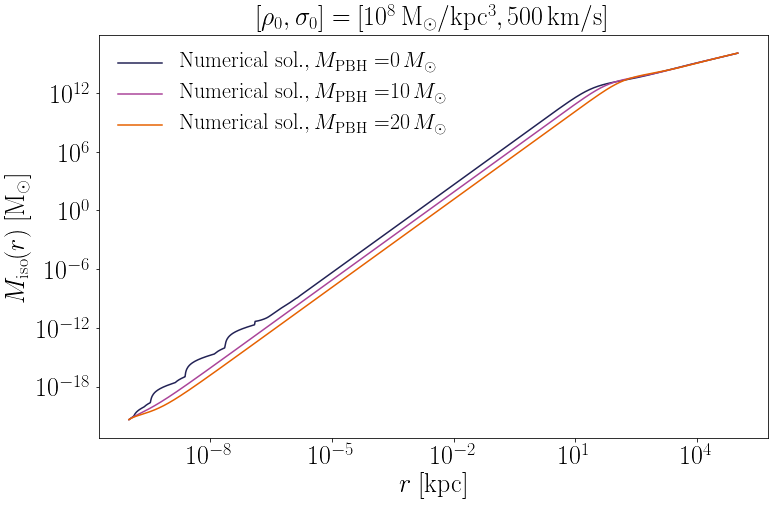

In [181]:
MPBHvals=[0,10,20]
colors=[[darkblue,blue],[magenta,red],[orange,yellow]]

pl.figure(figsize=(12,12/goldenratio))
pl.xscale('log')
pl.yscale('log')

for rho0 in [10.**8.]:
    for sigma0 in [500.]:
        for i in range(0,len(MPBHvals)):
            MPBH=MPBHvals[i]
            [rhoisoInt,MisoInt]=IsothermalProfileInt(MPBH,rho0,sigma0)
            #print([rhoisoInt,MisoInt])
            pl.plot(Rvals,MisoInt(Rvals),color=colors[i][0],linestyle='-',label=r'${\rm Numerical~sol.,} \, M_{\rm PBH}=$'+str(MPBH)+r'$\,M_{\odot}$') 
            #pl.plot(Rvals,Misoappr(MPBH,rho0,sigma0,Rvals),color=colors[i][1],linestyle='--',label=r'${\rm Analytical~sol.} \, M_{\rm PBH}=$'+str(MPBH)+r'$\,M_{\odot}$')
            #if not i==0:
            #    pl.axvline(RSchwarzschild(MPBH),color=colors[i][1],linestyle=':',label='Schwarzschild radius')
#pl.xlim([10.**(-16.),10.**5.])
pl.xlabel(r'$r \; \rm{[kpc]}$',fontsize=fontsize)
pl.ylabel(r'$M_{\rm iso}(r) \; \rm{[M_{\odot}]}$',fontsize=fontsize)
pl.legend(loc='upper left',edgecolor='white',fontsize=legendfontsize)
pl.title(r'$[\rho_{0},\sigma_{0}]={\rm[10^8 \, M_{\odot} / kpc^3, 500 \, km/s]}$',fontsize=fontsize)
pl.savefig('Plots/Miso_PBH.pdf',bbox_inches='tight')
print('Plots/Miso_PBH.pdf exported.')
pl.show()